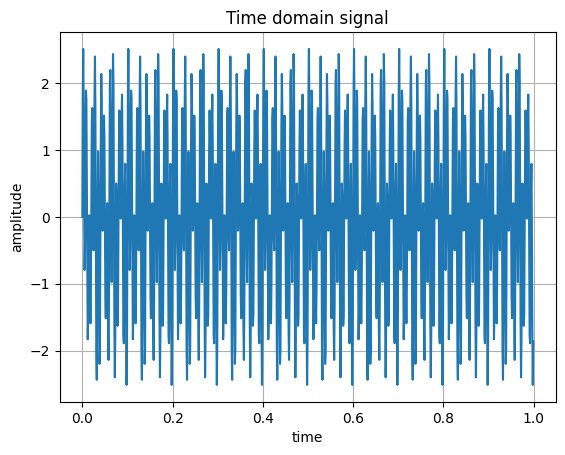

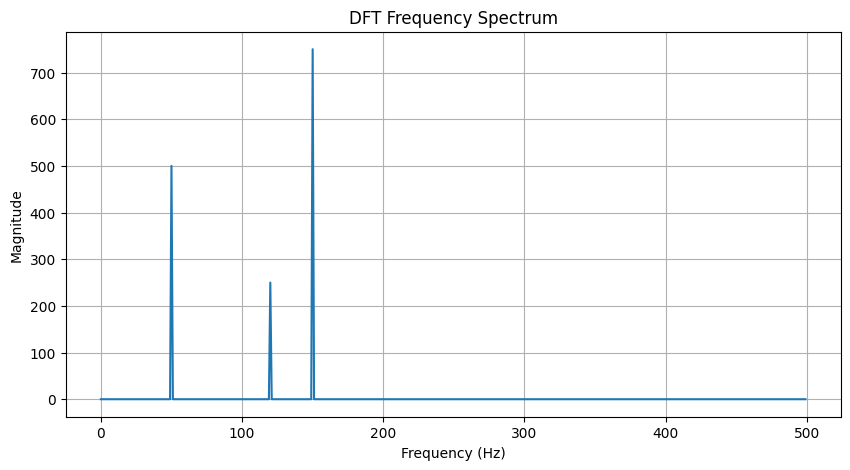

In [1]:
# Implementing DFT in Python 
import numpy as np
import matplotlib.pyplot as plt

def DFT(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1D signal.
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Output array (complex numbers)

    for k in range(N):  # Loop over frequency bins
        for n in range(N):  # Loop over time samples
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    
    return X
# Create a sample signal (two sine waves)
Fs = 1000  # Sampling rate
T = 1 / Fs  # Sampling interval
t = np.linspace(0, 1, Fs, endpoint=False)  # 1 second duration

# Signal: Combination of 50 Hz and 120 Hz sine waves
f1, f2, f3 = 50, 120, 150
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)+ 1.5 * np.sin(2 * np.pi * f3 * t)

plt.plot(t,signal)  # Single-sided spectrum
plt.title("Time domain signal")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.grid()
plt.show()
# Compute DFT
dft_output = DFT(signal)

# Compute frequency bins
freqs = np.fft.fftfreq(len(dft_output), T)

# Plot magnitude spectrum (single-sided)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:Fs//2], np.abs(dft_output[:Fs//2]))  # Single-sided spectrum
plt.title("DFT Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

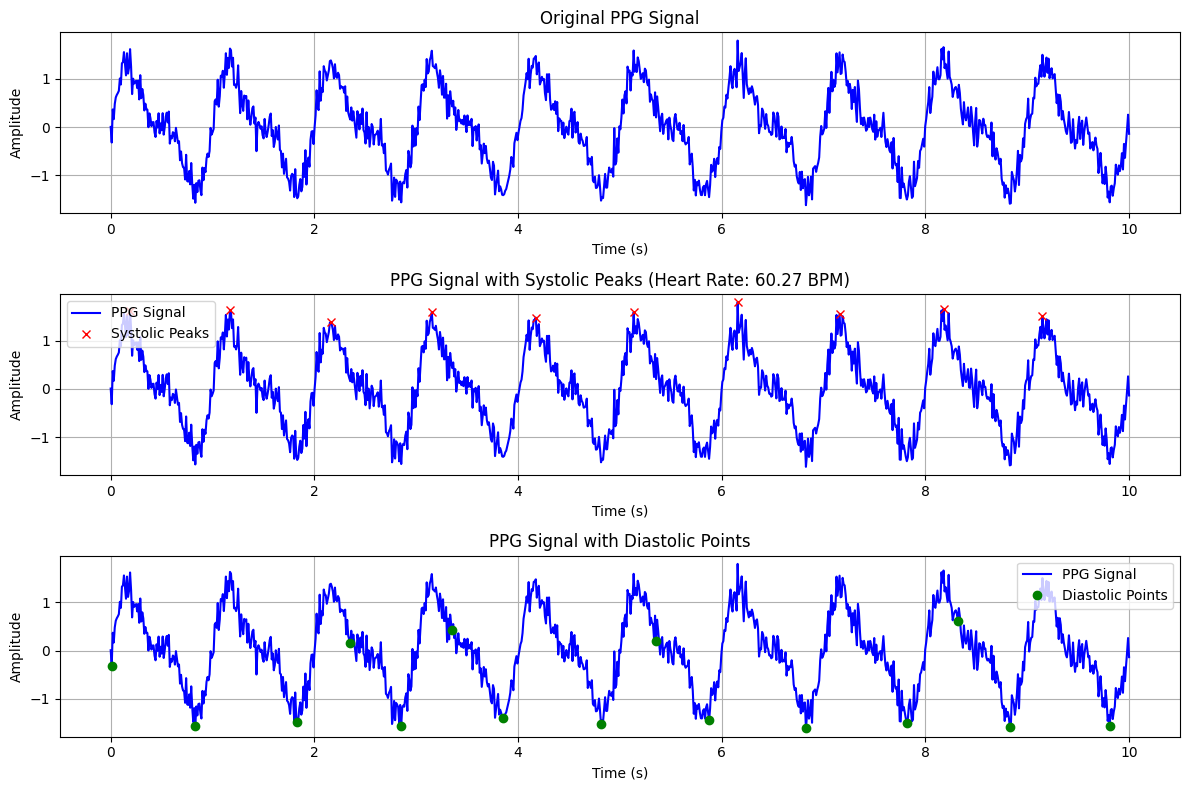

Heart Rate: 60.27 BPM


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Step 1: Generate a synthetic PPG signal
fs = 100  # Sampling frequency (Hz)
t = np.linspace(0, 10, 10 * fs)  # 10 seconds of signal
ppg_signal = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 2 * t) + 0.2 * np.random.normal(0, 1, len(t))

# Step 2: Detect systolic peaks
peaks, _ = find_peaks(ppg_signal, height=0.5, distance=fs//2)  # Adjust height and distance as needed

# Step 3: Detect diastolic points (troughs between peaks)
inverted_ppg = -ppg_signal
troughs, _ = find_peaks(inverted_ppg, distance=fs//2)

# Step 4: Calculate heart rate
peak_times = t[peaks]
heart_rate = 60 / np.mean(np.diff(peak_times))  # Beats per minute (BPM)

# Create subplots
plt.figure(figsize=(12, 8))

# Subplot 1: Original PPG signal
plt.subplot(3, 1, 1)
plt.plot(t, ppg_signal, label="PPG Signal", color="blue")
plt.title("Original PPG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Subplot 2: PPG signal with systolic peaks
plt.subplot(3, 1, 2)
plt.plot(t, ppg_signal, label="PPG Signal", color="blue")
plt.plot(t[peaks], ppg_signal[peaks], "x", label="Systolic Peaks", color="red")
plt.title(f"PPG Signal with Systolic Peaks (Heart Rate: {heart_rate:.2f} BPM)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Subplot 3: PPG signal with diastolic points
plt.subplot(3, 1, 3)
plt.plot(t, ppg_signal, label="PPG Signal", color="blue")
plt.plot(t[troughs], ppg_signal[troughs], "o", label="Diastolic Points", color="green")
plt.title("PPG Signal with Diastolic Points")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Output the heart rate
print(f"Heart Rate: {heart_rate:.2f} BPM")